#  전세계 top 컨텐츠와 각나라별 top컨텐츠의 일치도 히트맵

* 전 세계 top 트렌드 컨텐츠와 나라별 top 컨텐츠를 비교하여 일치도를 시각화
* 일본은 netflix 가 꽤나 큰 시장임에도 일치도가 낮다. (갈라파고스 화)
* 미국보다 멕시코~남미권 국가들이 일치도가 높게 나옴. (스페인어, 포르투칼어 권 작품들(종이의 집)이 상위권에 자주 진입하는 이유?)

## output

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\descartes\patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


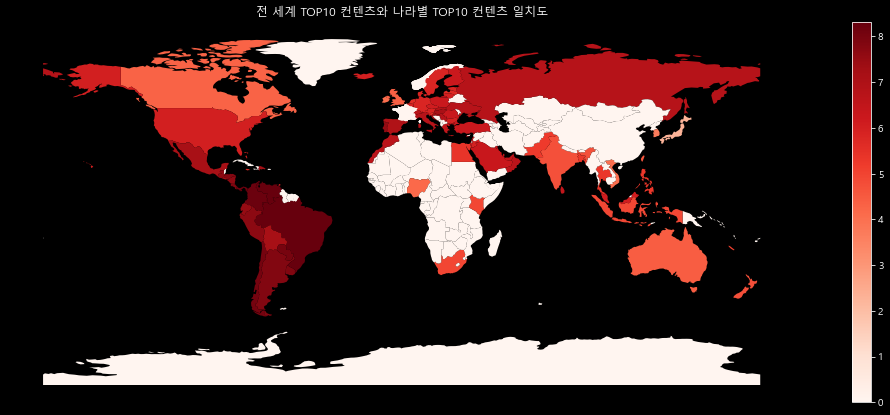

<Figure size 1440x1080 with 0 Axes>

In [84]:
ax = countries.plot(column='mean', legend=True, cmap="Reds", k=5,figsize=(20,7))

ax.set_axis_off()
ax.set_title("전 세계 TOP10 컨텐츠와 나라별 TOP10 컨텐츠 일치도")
#ax.set_xlabel('2021-07-04 ~ 12-19')

plt.figure(figsize=(20,15))
plt.show()

# code

In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
import os
plt.rc("font", family="Malgun Gothic")  #한글 깨짐 해결
from descartes import PolygonPatch

In [14]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries_addtrend =pd.read_csv('./merge_countries - merge_countries.csv')
countries_addtrend= countries_addtrend.drop(columns="Unnamed: 0")

df = pd.read_csv('./merge_countries - merge_countries.csv')
df_plot = df[['iso_a3','mean']]

countries = countries.merge(df_plot, 
                            how = 'outer', 
                            on = 'iso_a3',
                            )


C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [15]:
netflixallweeks_global = pd.read_csv('./all-weeks-global.csv')
netflixallweeks_countries = pd.read_csv('./all-weeks-countries.csv')

In [23]:
country_iso2_list = netflixallweeks_countries.country_iso2.drop_duplicates().to_list() # 조회할 나라 (94)
weeks_list = netflixallweeks_countries.week.drop_duplicates().to_list() #조회할 기간별 주 25
print(len(country_iso2_list),len(weeks_list))

94 25


In [17]:
countries_df_list=[]
for iso in country_iso2_list:
    globals()['countries_{}'.format(iso)] = netflixallweeks_countries[netflixallweeks_countries['country_iso2'] == iso]
    #countries_df_list.append(['countries_{}'.format(iso)]) # globals() 빠지면 str 로 처리됨
    countries_df_list.append(globals()['countries_{}'.format(iso)])

# 동적변수로 countries_KR, countries_JP, countries_VN.. 이런변수마다 나라별 df 를 지정


In [18]:
globals()['countries_{}'.format(iso)] # 마지막 VN

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
46500,Vietnam,VN,2021-12-19,Films,1,The Guardian,NaN,1
46501,Vietnam,VN,2021-12-19,Films,2,The Unforgivable,NaN,2
46502,Vietnam,VN,2021-12-19,Films,3,Back to the Outback,NaN,1
46503,Vietnam,VN,2021-12-19,Films,4,Red Notice,NaN,6
46504,Vietnam,VN,2021-12-19,Films,5,Green Snake,NaN,3
...,...,...,...,...,...,...,...,...
46995,Vietnam,VN,2021-07-04,TV,6,Reply 1988,Reply 1988: Season 1,1
46996,Vietnam,VN,2021-07-04,TV,7,"Nevertheless,","Nevertheless,: Season 1",1
46997,Vietnam,VN,2021-07-04,TV,8,Too Hot to Handle,Too Hot to Handle: Season 2,1
46998,Vietnam,VN,2021-07-04,TV,9,Record of Ragnarok,Record of Ragnarok: Season 1,1


In [19]:
for iso in country_iso2_list:
    globals()['global_week_nunique_list_{}'.format(iso)] = []

# 나라별 iso 2글자 리스트 생성

In [8]:
print(country_iso2_list)

['AR', 'AU', 'AT', 'BS', 'BH', 'BD', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'HR', 'CY', 'CZ', 'DK', 'DO', 'EC', 'EG', 'SV', 'EE', 'FI', 'FR', 'DE', 'GR', 'GP', 'GT', 'HN', 'HK', 'HU', 'IS', 'IN', 'ID', 'IE', 'IL', 'IT', 'JM', 'JP', 'JO', 'KE', 'KW', 'LV', 'LB', 'LT', 'LU', 'MY', 'MV', 'MT', 'MQ', 'MU', 'MX', 'MA', 'NL', 'NC', 'NZ', 'NI', 'NG', 'NO', 'OM', 'PK', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'QA', 'RO', 'RU', 'RE', 'SA', 'RS', 'SG', 'SK', 'SI', 'ZA', 'KR', 'ES', 'LK', 'SE', 'CH', 'TW', 'TH', 'TT', 'TR', 'UA', 'AE', 'GB', 'US', 'UY', 'VE', 'VN']


In [21]:
weeks_list

['2021-12-19',
 '2021-12-12',
 '2021-12-05',
 '2021-11-28',
 '2021-11-21',
 '2021-11-14',
 '2021-11-07',
 '2021-10-31',
 '2021-10-24',
 '2021-10-17',
 '2021-10-10',
 '2021-10-03',
 '2021-09-26',
 '2021-09-19',
 '2021-09-12',
 '2021-09-05',
 '2021-08-29',
 '2021-08-22',
 '2021-08-15',
 '2021-08-08',
 '2021-08-01',
 '2021-07-25',
 '2021-07-18',
 '2021-07-11',
 '2021-07-04']

In [29]:
global_week_nunique_dflist = []

for iso in country_iso2_list:
    globals()['countries_{}'.format(iso)] = netflixallweeks_countries[netflixallweeks_countries['country_iso2'] == iso] # countries_KR , 
    globals()['global_week_nunique_list_{}'.format(iso)] = []
    tempISO2 = globals()['countries_{}'.format(iso)]
    
    for i in weeks_list[::-1] : # [::-1] 리스트의 역순
        temp1 = tempISO2[tempISO2['week'] == i]
        temp1 = temp1[(temp1['category'] == 'Films')]
        temp3 = netflixallweeks_global[netflixallweeks_global['week'] == i]
        temp3 = temp3[(temp3['category'] == 'Films (English)') | (temp3['category'] == 'Films (Non-English)')]
        
        temp_element = [i, 30-pd.concat([temp1.show_title,temp3.show_title]).nunique()]    # 30 = (eng 10개, non-eng 10개  +  나라별 top10) 의 유니크값( 세계 top != 나라별 top)
        globals()['global_week_nunique_list_{}'.format(iso)].append(temp_element)
    global_week_nunique_dflist.append([iso,globals()['global_week_nunique_list_{}'.format(iso)]])    


In [30]:
print(global_week_nunique_list_AR)

[['2021-07-04', 8], ['2021-07-11', 5], ['2021-07-18', 8], ['2021-07-25', 8], ['2021-08-01', 6], ['2021-08-08', 9], ['2021-08-15', 8], ['2021-08-22', 9], ['2021-08-29', 7], ['2021-09-05', 8], ['2021-09-12', 6], ['2021-09-19', 10], ['2021-09-26', 8], ['2021-10-03', 8], ['2021-10-10', 6], ['2021-10-17', 9], ['2021-10-24', 9], ['2021-10-31', 10], ['2021-11-07', 9], ['2021-11-14', 8], ['2021-11-21', 7], ['2021-11-28', 8], ['2021-12-05', 8], ['2021-12-12', 8], ['2021-12-19', 6]]


In [32]:
global_week_nunique_dflist

[['AR',
  [['2021-07-04', 8],
   ['2021-07-11', 5],
   ['2021-07-18', 8],
   ['2021-07-25', 8],
   ['2021-08-01', 6],
   ['2021-08-08', 9],
   ['2021-08-15', 8],
   ['2021-08-22', 9],
   ['2021-08-29', 7],
   ['2021-09-05', 8],
   ['2021-09-12', 6],
   ['2021-09-19', 10],
   ['2021-09-26', 8],
   ['2021-10-03', 8],
   ['2021-10-10', 6],
   ['2021-10-17', 9],
   ['2021-10-24', 9],
   ['2021-10-31', 10],
   ['2021-11-07', 9],
   ['2021-11-14', 8],
   ['2021-11-21', 7],
   ['2021-11-28', 8],
   ['2021-12-05', 8],
   ['2021-12-12', 8],
   ['2021-12-19', 6]]],
 ['AU',
  [['2021-07-04', 4],
   ['2021-07-11', 5],
   ['2021-07-18', 3],
   ['2021-07-25', 1],
   ['2021-08-01', 3],
   ['2021-08-08', 4],
   ['2021-08-15', 4],
   ['2021-08-22', 5],
   ['2021-08-29', 6],
   ['2021-09-05', 4],
   ['2021-09-12', 6],
   ['2021-09-19', 4],
   ['2021-09-26', 5],
   ['2021-10-03', 5],
   ['2021-10-10', 4],
   ['2021-10-17', 4],
   ['2021-10-24', 3],
   ['2021-10-31', 4],
   ['2021-11-07', 3],
   ['2021-11

In [33]:
global_week_nunique_list_df = []

for iso in country_iso2_list:
    globals()['global_week_nunique_list_df_{}'.format(iso)] = pd.DataFrame(globals()['global_week_nunique_list_{}'.format(iso)])
    
    # global_week_nunique_list_df=global_week_nunique_list_df.append(globals()['global_week_nunique_list_df_{}'.format(iso)])
    

In [34]:
global_week_duplicate_list = []
for iso in country_iso2_list:
    globals()['global_week_duplicate_list_df_{}'.format(iso)] = pd.DataFrame(globals()['global_week_nunique_list_{}'.format(iso)])
    global_week_duplicate_list.append(globals()['global_week_duplicate_list_df_{}'.format(iso)])
    
    #globals()['global_week_duplicate_list_df_{}'.format(iso)].rename(columns={1:globals()['{}'.format(iso)]})

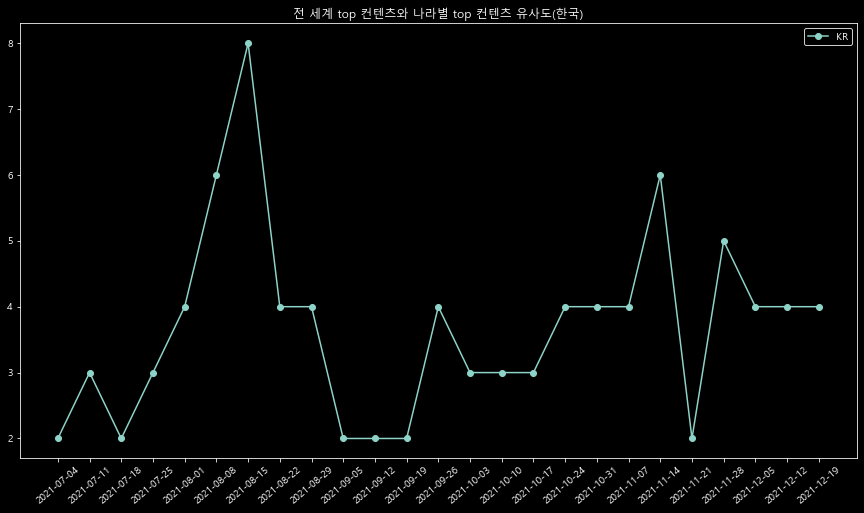

In [37]:
week = global_week_nunique_list_df_KR[0].to_list()
kr = global_week_nunique_list_df_KR[1].to_list()


plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.plot(week, kr, label = 'KR', marker = 'o')	
plt.legend(loc='best', shadow=True)
plt.xticks(rotation=40) 
plt.title('전 세계 top 컨텐츠와 나라별 top 컨텐츠 유사도(한국)')
plt.show()	

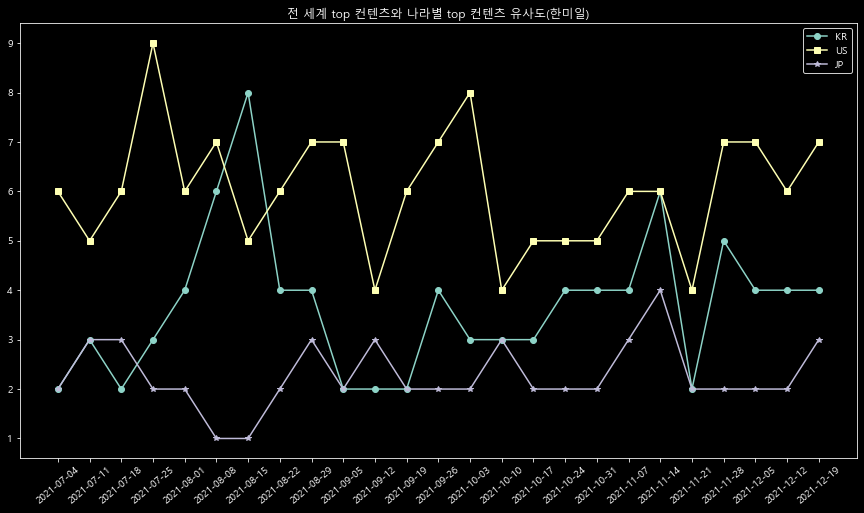

In [41]:
week = global_week_nunique_list_df_KR[0].to_list()
kr = global_week_nunique_list_df_KR[1].to_list()
us = global_week_nunique_list_df_US[1].to_list()
jp = global_week_nunique_list_df_JP[1].to_list()

plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.plot(week, kr, label = 'KR', marker = 'o')	
plt.plot(week, us, label = 'US', marker = 's')
plt.plot(week, jp, label = 'JP', marker = '*')
plt.legend(loc='best', shadow=True)
plt.xticks(rotation=40) 
plt.title('전 세계 top 컨텐츠와 나라별 top 컨텐츠 유사도(한미일)')
plt.show()	

# 세계 한번에 나타낼수 있으면 좋겠다는 피드백

In [42]:
merge1 = pd.merge(global_week_duplicate_list_df_AR,global_week_duplicate_list_df_AU, how='outer',on=0)

In [43]:
for iso in global_week_duplicate_list[2:]:
    merge1 = merge1.merge(iso, how='outer',on=0)
    
merge_all = merge1

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [47]:
merge_all.columns = ['week','AR', 'AU',
 'AT', 'BS', 'BH', 'BD', 'BE', 'BO', 'BR', 'BG',
 'CA', 'CL', 'CO', 'CR', 'HR', 'CY', 'CZ', 'DK',
 'DO', 'EC', 'EG', 'SV', 'EE', 'FI', 'FR', 'DE',
 'GR', 'GP', 'GT', 'HN', 'HK', 'HU', 'IS','IN',
 'ID', 'IE', 'IL', 'IT', 'JM', 'JP', 'JO', 'KE',
 'KW', 'LV', 'LB','LT', 'LU', 'MY','MV', 'MT',
 'MQ', 'MU', 'MX', 'MA', 'NL', 'NC', 'NZ', 'NI',
 'NG', 'NO', 'OM', 'PK', 'PA', 'PY', 'PE', 'PH',
 'PL', 'PT', 'QA', 'RO', 'RU', 'RE', 'SA', 'RS',
 'SG', 'SK', 'SI', 'ZA', 'KR', 'ES','LK', 'SE',
 'CH', 'TW', 'TH', 'TT', 'TR', 'UA', 'AE', 'GB',
 'US', 'UY', 'VE', 'VN']
merge_all2 = merge_all.set_index('week')

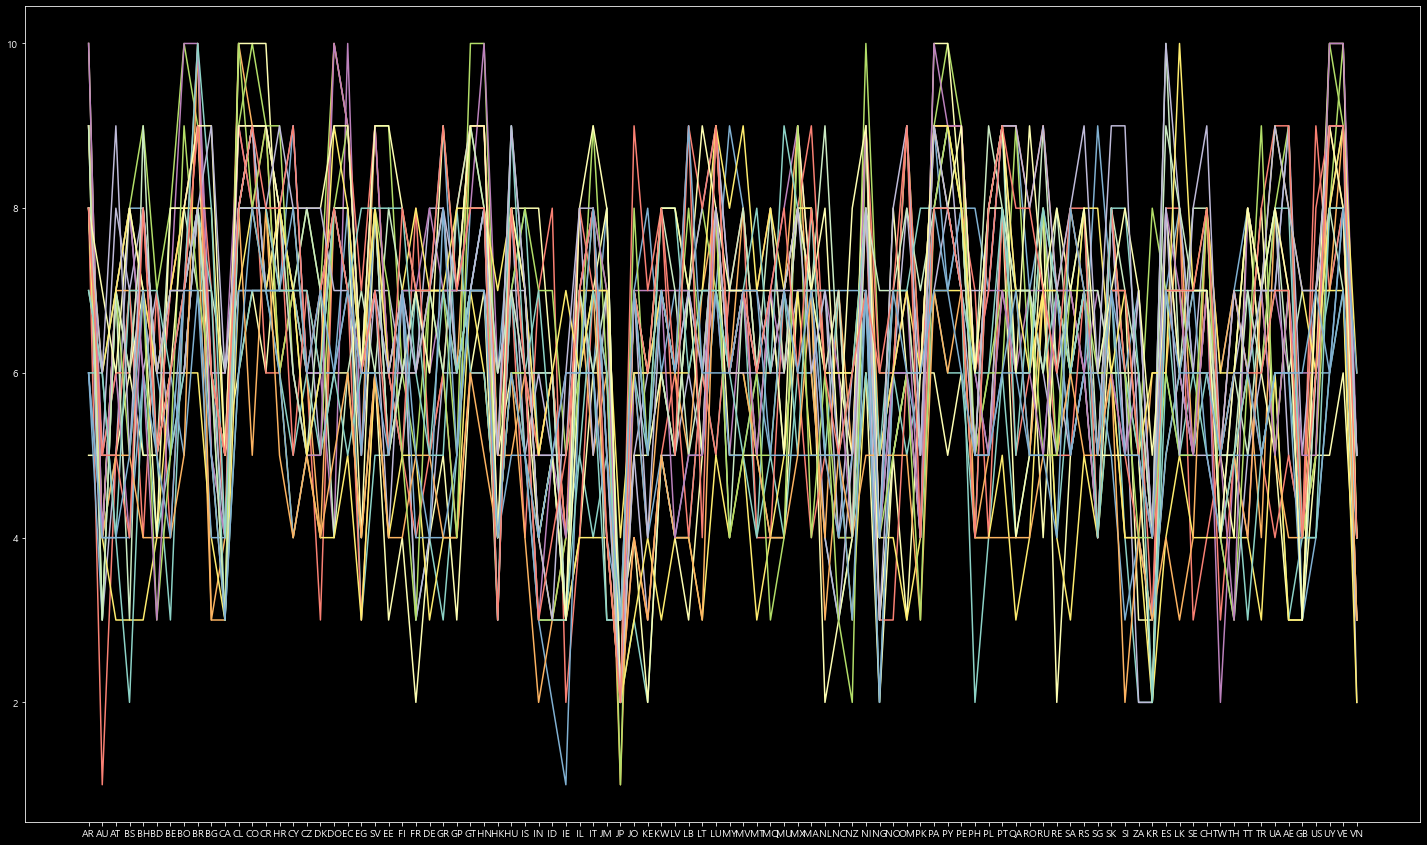

In [48]:
plt.figure(figsize=(25,15))
plt.plot(merge_all2.T)

* 나라들을 전부 나타내다보니 너무 많아 선그래프는 적절하지 않은 시각화로 생각됨
* geopandas 를 이용해 세계 지도로 시각화
* 주마다 세계지도의 변화를 보여주고 gif 형식으로 각 주마다의 사진을 붙이는 것도 생각했으나 나라별 평균으로 나라별의 특성을 보고 싶었음

In [49]:
merge_all2.T

week,2021-07-04,2021-07-11,2021-07-18,2021-07-25,2021-08-01,2021-08-08,2021-08-15,2021-08-22,2021-08-29,2021-09-05,...,2021-10-17,2021-10-24,2021-10-31,2021-11-07,2021-11-14,2021-11-21,2021-11-28,2021-12-05,2021-12-12,2021-12-19
AR,8,5,8,8,6,9,8,9,7,8,...,9,9,10,9,8,7,8,8,8,6
AU,4,5,3,1,3,4,4,5,6,4,...,4,3,4,3,6,6,7,6,5,4
AT,5,5,5,5,7,7,7,6,7,3,...,5,7,7,7,7,4,6,9,5,4
BS,7,6,8,7,8,7,8,4,3,3,...,5,5,8,6,8,7,8,5,4,5
BH,5,5,6,4,8,7,9,7,9,3,...,4,7,6,8,7,7,7,8,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GB,4,3,4,4,3,4,4,6,7,3,...,4,4,5,3,7,4,3,7,4,6
US,6,5,6,9,6,7,5,6,7,7,...,5,5,5,6,6,4,7,7,6,7
UY,7,5,9,7,6,7,8,8,8,7,...,9,10,10,8,8,8,9,9,9,6
VE,8,6,9,8,8,9,10,8,7,7,...,8,9,10,8,9,8,8,9,9,8


In [50]:
# 지도를 이용한 시각화에 필요한 라이브러리
import geopandas as gpd
gpd.__version__
from descartes import PolygonPatch

'0.6.2'

In [77]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [62]:
trend_mean_series=merge_all2.mean() # 나라별 중복count 의 평균
trend_mean_df = trend_mean_series.to_frame(name='mean')
merge_all_reverse =merge_all2.T
merge_all_reverse2 = merge_all_reverse.reset_index()
trend_mean_df=trend_mean_df.rename(columns={"index":"alpha-2"})
merge_all_reverse2['index']

0     AR
1     AU
2     AT
3     BS
4     BH
      ..
89    GB
90    US
91    UY
92    VE
93    VN
Name: index, Length: 94, dtype: object

나라별 유사도는 iso_alpha-2(예 : KR) 이고, geometry의 countries 에는 iso_alpha-3(예: KOR) 로 되있어서 두개다 있는 자료 필요.

In [67]:
iso_all = pd.read_csv('./iso_all.csv')
iso_all = iso_all.rename(columns= {"alpha-2":"index"})
iso_all

,name,index,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [78]:
df = pd.read_csv('./merge_countries - merge_countries.csv')
df_plot = df[['iso_a3','mean']]
countries = countries.merge(df_plot, 
                            how = 'outer', 
                            on = 'iso_a3',
                            )
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,mean
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.00
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.00
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.00
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",4.32
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",6.04
...,...,...,...,...,...,...,...
192,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",0.00
193,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",6.80
194,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.00
195,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",6.12


C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\descartes\patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


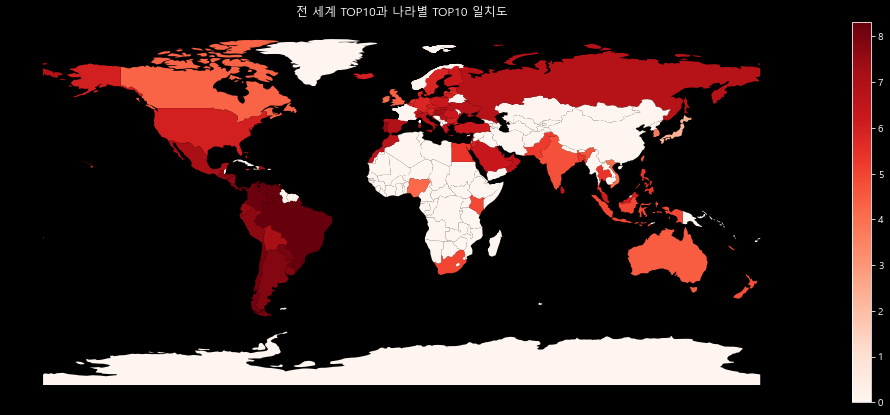

<Figure size 1440x1080 with 0 Axes>

In [79]:
ax = countries.plot(column='mean', legend=True, cmap="Reds", k=5,figsize=(20,7))

ax.set_axis_off()
ax.set_title("전 세계 TOP10과 나라별 TOP10 일치도")

plt.figure(figsize=(20,15))
plt.show()